### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [650]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [651]:
data = pd.read_csv('data/coupons.csv')

In [602]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<b>2.1 Check the shape of dataframe.</b>

In [603]:
data.shape

(12684, 26)

<b>2.2 Check the missing values for each column.</b>

In [604]:
missing_values_all = data.isna().sum()
missing_values_all

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<b>2.3 Find percentage of missing values for each column which have missing values.</b>

In [605]:
missing_values = missing_values_all[missing_values_all > 0]
missing_values
missing_values_percentage = (missing_values / data.shape[0]) * 100
missing_values_percentage

car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

<h><b>Null Values Summary of Columns</b></h>
    <ol>
      <li><b><i>car</i>:</b> More than 99% of values are missing.</li>
      <li><b><i>Bar</i>:</b> Less than 1% of values are missing.</li>
      <li><b><i>CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50</i>:</b> Missing values in the range of 1% to 2%.</li>
    </ol>

3. Decide what to do about your missing data -- drop, replace, other...

<b>3.1 Check unique values for each column with missing values and handle missing data.</b>

<b>3.1.1 <i>Car</i> column have more than 99% of values missing. The type of vehicle should not affect coupon acceptance. We could drop the car column or fill it with a value 'car'. I would drop the column as this column is agnostic of coupon acceptance with 99% missing values.</b>

In [606]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [607]:
data.drop('car', axis=1, inplace=True)

In [608]:
data.shape

(12684, 25)

<b>3.1.2 <i>Bar</i> column is categorical column and have ~0.84% of values missing. We could replace missing values with mode.</b>

<b>Check unique values</b>

In [609]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

<b>Check frquency of each unique values</b>

In [652]:
data.groupby('Bar')['Bar'].value_counts()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
Name: count, dtype: int64

<b>Fill missing values with mode of the column</b>

In [630]:

#data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])

<b>Verify if missing values replacement worked as expected</b>

In [628]:
data['Bar'].isna().sum()

np.int64(107)

In [629]:
data.groupby('Bar')['Bar'].value_counts()

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5197
Name: count, dtype: int64

<b>3.1.3 <i>CoffeHouse</i> column is categorical column and have ~1.71% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

<b>Check unique values</b>

In [17]:
pd.Series(data['CoffeeHouse'].unique())

0    never
1    less1
2      4~8
3      1~3
4      gt8
5      NaN
dtype: object

<b>Check frquency of each unique values</b>

In [18]:
data.groupby('CoffeeHouse')['CoffeeHouse'].value_counts()

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3385
never    2962
Name: count, dtype: int64

<b>Fill missing values with random column values as multiple values have close mode</b>

In [460]:
# Fill missing values with mode of the column
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])

<b>Verify if missing values replacement worked as expected</b>

In [20]:
data['CoffeeHouse'].isna().sum()

np.int64(0)

In [21]:
data.groupby('CoffeeHouse')['CoffeeHouse'].value_counts()

CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3602
never    2962
Name: count, dtype: int64

<b>3.1.4 <i>CarryAway</i> column is categorical column and have ~1.19% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

<b>Check unique values</b>

In [22]:
data['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

<b>Check frquency of each unique values</b>

In [23]:
data.groupby('CarryAway')['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
gt8      1594
less1    1856
never     153
Name: count, dtype: int64

<b>Fill missing values with mode of the column</b>

In [24]:
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])

<b>Verify if missing values replacement worked as expected</b>

In [25]:
data['CarryAway'].isna().sum()

np.int64(0)

In [26]:
data.groupby('CarryAway')['CarryAway'].value_counts()

CarryAway
1~3      4823
4~8      4258
gt8      1594
less1    1856
never     153
Name: count, dtype: int64

<b>3.1.5 <i>RestaurantLessThan20</i> column is categorical column and have ~1.02% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

<b>Check unique values</b>

In [27]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

<b>Check frquency of each unique values</b>

In [28]:
data.groupby('RestaurantLessThan20')['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
gt8      1285
less1    2093
never     220
Name: count, dtype: int64

<b>Fill missing values with mode of the column</b>

In [29]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])

<b>Verify if missing values replacement worked as expected</b>

In [30]:
data['RestaurantLessThan20'].isna().sum()

np.int64(0)

In [31]:
data.groupby('RestaurantLessThan20')['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5506
4~8      3580
gt8      1285
less1    2093
never     220
Name: count, dtype: int64

<b>3.1.6 <i>Restaurant20To50</i> column is categorical column and have ~1.49% of values missing. We would replace missing values with random column values as mode of multiple values are high.</b>

<b>Check unique values</b>

In [32]:
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

<b>Check frquency of each unique values</b>

In [33]:
data.groupby('Restaurant20To50')['Restaurant20To50'].value_counts()

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6077
never    2136
Name: count, dtype: int64

<b>Fill missing values with mode of the column</b>

In [34]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

<b>Verify if missing values replacement worked as expected</b>

In [35]:
data['Restaurant20To50'].isna().sum()

np.int64(0)

In [36]:
data.groupby('Restaurant20To50')['Restaurant20To50'].value_counts()

Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6266
never    2136
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [632]:
total_observations = data.shape[0]
coupon_accept_count = data[data['Y'] == 1]['Y'].sum()
coupon_acceptance_proportion = np.round((coupon_accept_count / total_observations) * 100, 2)
print(f"Coupon Acceptance Proportion: {coupon_acceptance_proportion} %")

Coupon Acceptance Proportion: 56.84 %


<h><b>Summary<b></h>
    <ol>
      <li><b>Coupon Acceptance Proportion: 56.84 %</b></li>
    </ol>

Text(0.5, 1.0, 'Coupon Acceptance Proportion')

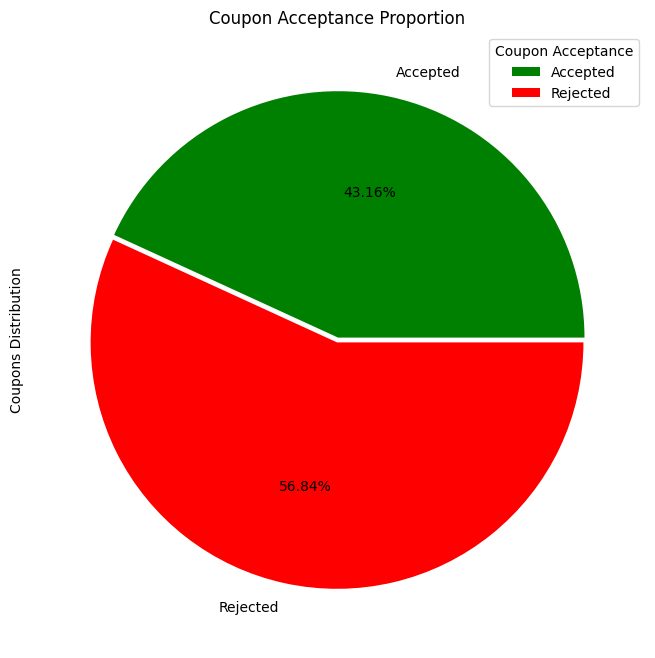

In [633]:
coupons_acceptance_df = data.groupby('Y')['Y'].value_counts()
plt.figure(figsize=(8, 8))
coupons_acceptance_df.plot(kind='pie', labels=['Accepted', 'Rejected'], explode = [0.01,0.01], autopct = '%1.2f%%', colors = ['g', 'r'])
plt.legend(title="Coupon Acceptance")
plt.ylabel('Coupons Distribution')
plt.title('Coupon Acceptance Proportion')

5. Use a bar plot to visualize the `coupon` column.

In [634]:
# Check unique values for coupon column
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [635]:
# Find count for each type of coupon
coupon = data['coupon'].value_counts().reset_index()
coupon

,coupon,count
0,Coffee House,3996
1,Restaurant(<20),2786
2,Carry out & Take away,2393
3,Bar,2017
4,Restaurant(20-50),1492


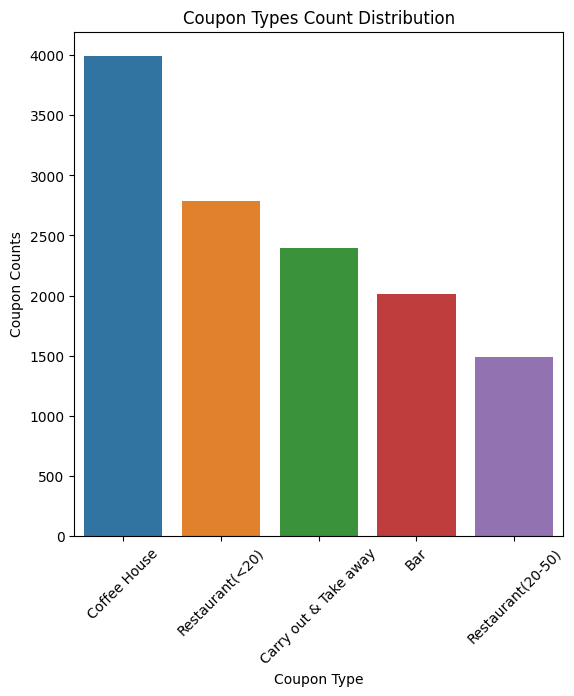

In [636]:
# Bar plot visualization for coupon types
plt.figure(figsize=(6, 6))
sns.barplot(coupon, x='coupon', y='count', hue='coupon')
plt.title('Coupon Types Count Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Counts')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

In [637]:

temp_df = data[['temperature']]
temp_df.head()

,temperature
0,55
1,80
2,80
3,80
4,80


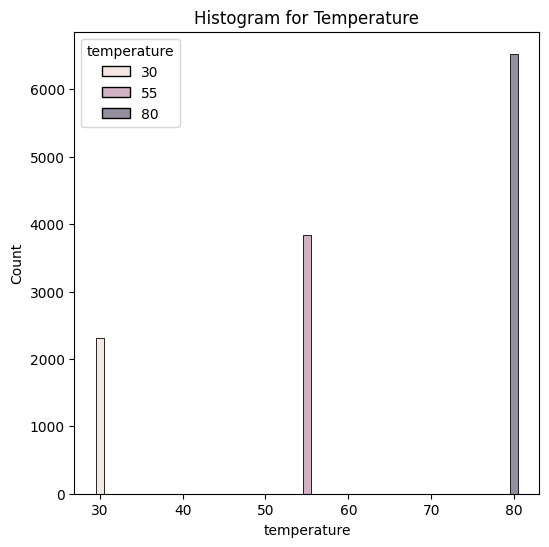

In [638]:
# Visulation for temperature column
plt.figure(figsize=(6, 6))
sns.histplot(temp_df, x='temperature', hue='temperature', discrete=True, edgecolor='black')
plt.title('Histogram for Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [656]:
# Check unique values for coupon column
data['coupon'].unique()
data.iloc[0]

destination                      No Urgent Place
passanger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

In [654]:
# Get dataframe for coupon type 'Bar'
bar_df = data[data['coupon'] == 'Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [642]:
base_bar_df = bar_df.query('Y == 1')

2. What proportion of bar coupons were accepted?


In [643]:
# find total number of bar coupons
total_bar_coupons = bar_df.shape[0]
total_bar_coupons

2017

In [644]:
# find total number of accepted bar coupons
accepted_bar_coupons = base_bar_df['Y'].count()
accepted_bar_coupons

np.int64(827)

In [645]:
# Accepted bar coupons proportion compared to total bar coupons
accpted_bar_coupons_proportion = np.round((accepted_bar_coupons / total_bar_coupons) * 100, 2)
print(f'Accepted bar coupons proportion: {accpted_bar_coupons_proportion} %')

Accepted bar coupons proportion: 41.0 %


<h><b>Summary-2<b></h>
    <ol>
      <li><b>Acceptance count for bar coupons (B1): 827</b></li>
      <li><b>Total bar coupons count (B2): 2017</b></li>
      <li><b>Bar coupons acceptance rate (B1/B2): 827 / 2017 = 41.0 %</b></li>
    </ol>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [657]:
# Check unique values for Bar column
bar_df['Bar'].unique()
bar_df['Bar'].count()

np.int64(1996)

In [647]:
# Find value counts for bar visits frquency
bar_visits_value_counts_df = base_bar_df.groupby('Bar')['Bar'].value_counts()
bar_visits_value_counts_df

Bar
1~3      257
4~8      117
gt8       36
less1    253
never    156
Name: count, dtype: int64

In [648]:
# Bar visits frequnecy comparision for <=3 and >=4 visits for accepted bar coupons
bar_freq_3_or_less = ['1~3', 'less1', 'never']
bar_freq_4_or_more = ['4~8','gt8']
bar_freq_3_or_less_count = base_bar_df.query('Bar in @bar_freq_3_or_less')['Bar'].value_counts().sum()
bar_freq_4_or_more_count = base_bar_df.query('Bar in @bar_freq_4_or_more')['Bar'].value_counts().sum()

accept_rate_visits_3_or_fewer = 100 * np.round(bar_freq_3_or_less_count / total_bar_coupons, 2)
accept_rate_visits_4_or_more = 100 * np.round(bar_freq_4_or_more_count / total_bar_coupons, 2)
visits_count_accept_rate_comp = np.round(accept_rate_visits_3_or_fewer / accept_rate_visits_4_or_more, 2)
print(f'Bar visits frequency comparision: {accept_rate_visits_3_or_fewer}/{accept_rate_visits_4_or_more}/{visits_count_accept_rate_comp}')

Bar visits frequency comparision: 33.0/8.0/4.12


<h><b>Summary-3<b></h>
    <ol>
      <li><b>Acceptance rate for visits 3 or fewer (R1): 33.0 %</b></li>
      <li><b>Acceptance rate for visits 4 or more (R2): 8.0 %</b></li>
      <li><b>Acceptance rate proportion (R1/R2): 33.0 / 8.0 = 4.12 times</b></li>
    </ol>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [302]:
# Check unique values for column age
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [420]:
# Get acceptance count for visitor age more than 25 and visits more than once a month
age_list = ['21', 'below21']
bar_visits_count_list = ['1~3', 'gt8', '4~8']
age25_plus_bar_visitors_count = base_bar_df.query('age not in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts().sum()
age25_plus_bar_visitors_count

np.int64(292)

In [419]:
# Get acceptance count for other bar visitors
other_bar_visitors_count = base_bar_df.query('age in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts().sum()
other_bar_visitors_count

np.int64(118)

In [444]:
# Calculate acceptance rate for Age >= 25 and bar visits >= 1
acceptance_rate_age_25plus = np.round((age25_plus_bar_visitors_count / accepted_bar_coupons) * 100, 2)
print(f'Acceptance rate for Age >= 25 and bar visits >= 1: {acceptance_rate_age_25plus} %')

Acceptance rate for Age >= 25 and bar visits >= 1: 35.31 %


In [446]:
# Calculate acceptance rate other bar visitors
acceptance_rate_other_bar_visitors = np.round((other_bar_visitors_count / accepted_bar_coupons) * 100, 2)
print(f'Acceptance rate for other bar visitors: {acceptance_rate_other_bar_visitors} %')

Acceptance rate for other bar visitors: 14.27 %


In [447]:
# Acceptance rate comparision for 25+ visitors vs other bar visitors
age_25_plus_to_other_visitos = np.round(acceptance_rate_age_25plus / acceptance_rate_other_bar_visitors, 2)
print(f'Rate comparision for 25+ visitors vs other bar visitors: {age_25_plus_to_other_visitos}')

Rate comparision for 25+ visitors vs other bar visitors: 2.47


<h><b>Summary-4: Yes, acceptance rate is higher (2.47 times) for 25+ age vistors compared to younger bar visitors with age < 25.<b></h>
    <ol>
      <li><b>Acceptance rate for Age >= 25 and bar visits >= 1 (R1): 35.31 %</b></li>
      <li><b>Acceptance rate for bar visitors with Age < 25 (R2): 14.27 %</b></li>
      <li><b>Rate comparision for 25+ years age visitors vs younger visitors with age < 25 (R1/R2): 35.31 / 14.27 = 2.47 times.</b></li>
    </ol>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [309]:
# Check unique values for column passanger
bar_df['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [308]:
# Check unique values for column occupation
bar_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [438]:
no_kids_no_farming_count = base_bar_df.query('passanger != "Kid(s)" and Bar in @bar_visits_count_list and occupation != "Farming Fishing & Forestry"').groupby('Bar')['Bar'].value_counts().sum()
no_kids_no_farming_count

np.int64(393)

In [439]:
no_kids_no_farming_accept_rate = np.round((no_kids_no_farming_count / accepted_bar_coupons) * 100, 2)
no_kids_no_farming_accept_rate

np.float64(47.52)

In [440]:
others_no_kids_no_farming = accepted_bar_coupons - no_kids_no_farming_count
others_no_kids_no_farming

np.int64(434)

In [441]:
others_no_kids_no_farming_accept_rate = np.round((others_no_kids_no_farming / accepted_bar_coupons) * 100, 2)
others_no_kids_no_farming_accept_rate

np.float64(52.48)

In [443]:
acceptance_rate_proportion = np.round(others_no_kids_no_farming_accept_rate / no_kids_no_farming_accept_rate, 2)
acceptance_rate_proportion

np.float64(1.1)

<h><b>Summary-5: Acceptance rate for other drivers was ~10% higher than the drivers with no passanger kids and no farming occupation.<b></h>
    <ol>
      <li><b>Acceptance rate for drivers bar visits > 1 and passengers were not kids and occupation was not farming(D1): 47.52 %</b></li>
      <li><b>Acceptance rate for other drivers (D2): 52.48 %</b></li>
      <li><b>Acceptance rate proportion between drivers (D2/D1):  52.48 / 47.52 = 1.1 times</b></li>
    </ol>

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [425]:
# Check unique values of maritalStatus column
bar_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

6.1: go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [240]:
# Check unique values for "income" column
bar_df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [426]:
# Count of bar vistors who visted more than once in a month, had no kids passannder and were not widowed
multi_bar_visits_no_kids_no_widow = base_bar_df.query('passanger != "Kid(s)" and Bar in @bar_visits_count_list and maritalStatus != "Widowed"').groupby('Bar')['Bar'].value_counts().sum()
multi_bar_visits_no_kids_no_widow

np.int64(393)

In [428]:
# Acceptance rate of bar vistors who (visted more than once in a month, had no kids passannder and were not widowed) 
# compared to total bar coupons accepted
multi_bar_visits_no_kids_no_widow_rate = np.round((multi_bar_visits_no_kids_no_widow / accepted_bar_coupons) * 100, 2)
multi_bar_visits_no_kids_no_widow_rate

np.float64(47.52)

<h><b>Summary-6.1: Acceptance rate for drivers with bar visits > 1, no kids passengers and not widowed (D1): 47.52 %<b></h>

6.2: go to bars more than once a month and are under the age of 30

In [391]:
# Count of multiple times bar vistors who are age < 30
age_inclusion_list = ['21', '26', 'below21']
multi_bar_visits_under30 = bar_df.query('Y == 1 and Bar in @bar_visits_count_list and age in @age_inclusion_list').groupby('Bar')['Bar'].value_counts().sum()
multi_bar_visits_under30

np.int64(249)

In [429]:
# Acceptance rate of multiple times bar vistors who are age < 30
multi_bar_visits_under30_rate = np.round((multi_bar_visits_under30 / accepted_bar_coupons) * 100, 2)
multi_bar_visits_under30_rate

np.float64(30.11)

<h><b>Summary-6.2: Acceptance rate for drivers with bar visits > 1 and age below 30 (D2): 30.11 %<b></h>

6.3: go to cheap restaurants more than 4 times a month and income is less than 50K

In [258]:
# Checj unique values for RestaurantLessThan20 column
bar_df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [259]:
# set restuarent and income exclusion lists
restaurant_inclusion_list = ['4~8', 'gt8']
income_inclusion_list = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']

In [433]:
# Count of multiple times cheap restaurents vistors with income < 50k
multi_rest_visits_under50k_income = base_bar_df.query('RestaurantLessThan20 in @restaurant_inclusion_list and income in @income_inclusion_list').groupby('Bar')['Bar'].value_counts().sum()
multi_rest_visits_under50k_income

np.int64(155)

In [430]:
# Acceptance rate of multiple times cheap restaurents vistors with income < 50k
multi_rest_visits_under50k_income_rate = np.round((multi_rest_visits_under50k_income / accepted_bar_coupons) * 100, 2)
multi_rest_visits_under50k_income_rate

np.float64(18.86)

<h><b>Summary-6.3: Acceptance rate for drivers with restaurent visits > 4 and income below 50k (D3): 18.86 %<b></h>

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<h><b>Hypothesize Summary - Bar Coupons Acceptance<b></h>
    <ol>
      <li><b>Overall bar coupons acceptance rate is: 41 %</b></li>
      <li><b>Drivers with bar visits 3 or less tend to accept coupon 3.26 times more than the visitos who visit the bar more than 3 times a month.</b></li>
      <li><b>Drivers older than age of 25 tend to accept bar coupons, 2.47 times more than younger visitors.</b></li>
      <li><b>Acceptance rate for other drivers was ~10% higher than the drivers with no passanger kids and no farming occupation.</b></li>
      <li><b>D1: Drivers who were not widowed, have no kids passangers and often visit bar tends to accept coupon at the rate of 47.52 %.</b></li>
      <li><b>D2: Drivers at age below 30 and who visit bar multiple times in a month tend to accept the coupon at the rate of 30.11 %.</b></li>
      <li><b>D3: Drivers with income below 50k and who visit restaurent more than 4 times a month, tend to accept the coupon at the rate of 18.86 %.</b></li>
    </ol>

ValueError: 'explode' must be of length 'x', not 4

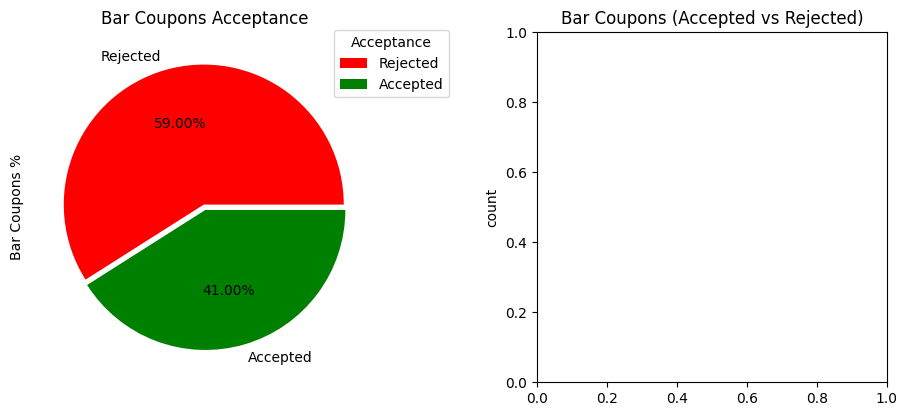

In [649]:
plt.figure(figsize = (12,10))
plt.subplot(221)
plt.title("Bar Coupons (Accepted vs Rejected)")
bar_df['Y'].value_counts().plot(kind='pie', labels=['Rejected', 'Accepted'], explode = [0.02,0.02], autopct = '%1.2f%%', colors = ['r', 'g'])
plt.legend(title="Acceptance", bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.ylabel('Bar Coupons %')
plt.title('Bar Coupons Acceptance')

bar_freq_3_or_less = base_bar_df.query('Bar in @bar_freq_3_or_less')['Bar']
bar_freq_4_or_more = base_bar_df.query('Bar in @bar_freq_4_or_more')['Bar']
bar_freq_df = pd.concat([bar_freq_3_or_less, bar_freq_4_or_more])
plt.subplot(222)
plt.title("Bar Coupons (Accepted vs Rejected)")
bar_freq_df.value_counts().plot(kind='pie', explode = [0.02,0.02, 0.02, 0.02], autopct = '%1.2f%%', colors = ['g', 'g', 'r', 'r'])
plt.legend(title="Visits Frequency", bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.ylabel('Coupons Distribution')
plt.title('Acceptance by Visits Frequency')

plt.subplot(223)
age_25plus = base_bar_df.query('age not in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts()
age_25below = base_bar_df.query('age in @age_list and Bar in @bar_visits_count_list').groupby('Bar')['Bar'].value_counts()
combined_df = pd.concat([age_25plus, age_25below], keys=['Age 25+', 'Age 25 Below']).reset_index()
combined_df.columns = ['Age Group', 'Bar', 'count']
plt.title("Acceptance - Age 25+ vs Below 25")
sns.lineplot(data=combined_df, x='Bar', y='count', hue='Age Group')
plt.xlabel("Bar Visits Frequency")
plt.ylabel("Coupons Acceptance Count")

plt.subplot(224)
plt.title("Bar Coupons Acceptance by Age")
age_bar_visits_df = pd.crosstab(base_bar_df.age.to_frame().query('age in @age_inclusion_list')['age'], base_bar_df.Bar.to_frame().query('Bar in @bar_visits_count_list')['Bar'])
crosstab_long = age_bar_visits_df.reset_index().melt(id_vars='age', var_name='Bar', value_name='count')
crosstab_long
sns.barplot(x='Bar', y='count', hue='age', data=crosstab_long)
plt.xlabel("Bar Visits Frequency")
plt.ylabel("Coupons Acceptance Count")

# df = data[['passanger', 'coupon', 'maritalStatus', 'gender']]
# dfm = df.melt('coupon', var_name='cols', value_name='vals').reset_index()
# dfm

# pd.plotting.parallel_coordinates(dfm, class_column='coupon', cols=['passanger', 'coupon', 'maritalStatus', 'gender'], colormap=plt.get_cmap("Set2"), axvlines=True)
# plt.show()



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  